* Name : Joonyoung-Choi
* Student ID: 20112096
* Description: Binary-classfication using MNIST data
* github: https://github.com/mydream757/Computer_Vision

1. Import libraries

* import needed libraries.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as lin
from matplotlib.image import imread

2. Read data from CSV files

* get ready for using MNIST data

In [2]:
file_data_train = "mnist_train.csv"
file_data_test  = "mnist_test.csv"

h_data_train    = open(file_data_train, "r")
h_data_test     = open(file_data_test, "r")

data_train      = h_data_train.readlines()
data_test       = h_data_test.readlines()

h_data_train.close()
h_data_test.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_train   = len(data_train)   # number of training images
num_test    = len(data_test)    # number of testing images

3. Define functions

* the function of data normalizing

In [3]:
# normalize the values of the input data to be [0, 1]
def normalize(data):
    data_normalized = (data - min(data)) / (max(data) - min(data))
    return(data_normalized)

* the function of computing distance

In [4]:
def distance(x, y):

    d = (x - y) ** 2
    s = np.sum(d)
    # r = np.sqrt(s)
    return(s)

4. Define classifier

* make containers which contain MNIST image data

In [5]:
#make a matrix each column of which represents an images
list_image_train    = np.empty((num_train, size_row * size_col), dtype=float)
list_label_train    = np.empty(num_train, dtype=int)

list_image_test     = np.empty((num_test, size_row * size_col), dtype=float)
list_label_test     = np.empty(num_test, dtype=int)

* parse the data sets

In [6]:
count = 0
for line in data_train:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label_train[count]    = label
    list_image_train[count,:]  = im_vector

    count += 1

count = 0
for line in data_test:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label_test[count]    = label
    list_image_test[count,:]  = im_vector

    count += 1

* compute average images of each digits and label 1 or -1

In [7]:
im_average  = np.zeros((10, size_col*size_row), dtype=float)
im_count    = np.zeros(10, dtype=int)

for i in range(num_train):
    im_average[list_label_train[i],:] += list_image_train[i,:]
    im_count[list_label_train[i]] += 1

im_label = np.zeros((10,1), dtype=float)
for i in range(10):
    im_average[i,:] /= im_count[i]
    #label = 0 : 1, others : -1
    if i==0:
        im_label[0,0] = 1
    else:
        im_label[i,0] = -1

* compute coefficient.

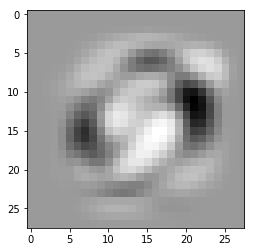

In [8]:
#compute coefficient using average image vectors
inverse = lin.pinv(im_average)
coefficient = np.dot(inverse, im_label)

#plot the coefficient image
image_coeff = coefficient[:,0].reshape((size_row, size_col))
plt.figure()
plt.imshow(image_coeff, cmap='Greys', interpolation='None')
plt.show()

5. Evaluate the classifier using the test data

* ready for test

In [9]:
#Ready for test
experiment_label_test = np.empty(num_test, dtype=int)
experiment_average_test = np.zeros((4,size_row * size_col), dtype=float)
experiment_count_test = np.zeros(4, dtype=int)

* label 1 or -1 to test data and check TP, FP, FN, TN

In [10]:
#Evaluate my classifier using MNIST test set
result = np.dot(list_image_test, coefficient)
num = 0
for i in range(result.size):
    #sign(f(x))
    if result[i] >= 0:
        experiment_label_test[i] = 1
    else:
        experiment_label_test[i] = -1
    #check TP, FP, TN, FN
    if experiment_label_test[i] == 1 and list_label_test[i] == 0:
        num = 0 #then TP
    elif experiment_label_test[i] == 1 and list_label_test[i] !=0:
        num = 1 #then FP
    elif experiment_label_test[i] == -1 and list_label_test[i] == 0:
        num = 2 #then FN
    elif experiment_label_test[i] == -1 and list_label_test[i] !=0:
        num = 3 #then TN
    experiment_average_test[num,:] += list_image_test[i,:]
    experiment_count_test[num] += 1

* plot the result

TP :  871
FP :  417
FN :  109
TN :  8603


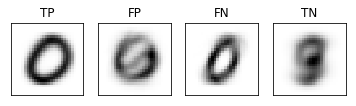

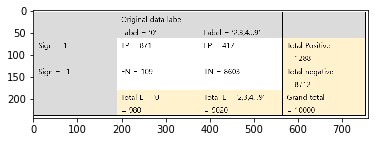

In [11]:
plt.figure()
for i in range(4):
    experiment_average_test[i, :] /= experiment_count_test[i]
    title = ['TP','FP','FN','TN']
    plt.subplot(1, 4, i+1)
    plt.title(title[i])
    plt.imshow(experiment_average_test[i,:].reshape((size_row, size_col)), cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

    print(title[i],': ',experiment_count_test[i])
table = imread('Eval_table.png')
plt.figure()
plt.imshow(table)
plt.show()

* compute evaluations

In [12]:
#print the evaluation
print('Error rate: ',(experiment_count_test[1]+experiment_count_test[2])*100/num_test,'%')
print('Precision: ', experiment_count_test[0]*100/(experiment_count_test[0]+experiment_count_test[1]),'%')
print('Recall: ',experiment_count_test[0]*100/(experiment_count_test[0]+experiment_count_test[2]),'%')
print('False positive rate: ',experiment_count_test[1]*100/(experiment_count_test[1]+experiment_count_test[3]),'%')
print('Accuracy: ', (experiment_count_test[0]+experiment_count_test[3])*100/num_test,'%')
plt.show()

Error rate:  5.26 %
Precision:  67.62422360248448 %
Recall:  88.87755102040816 %
False positive rate:  4.623059866962306 %
Accuracy:  94.74 %
